# 전체리뷰 - tokens 컬럼 2개 분리(명사/형,부)

In [78]:
import pandas as pd
df = pd.read_csv('/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments_final1.csv')

In [79]:
import pandas as pd
import re
from konlpy.tag import Komoran



In [80]:
# review_text_preprocessed 컬럼이 없는 경우, 이를 추가
if 'comment_text_preprocess' not in df.columns:
    df['comment_text_preprocess'] = ""

In [81]:
# 1. 특수 문자를 제거하는 함수 정의
def remove_special_characters(text):
    if isinstance(text, str):  # 입력이 문자열인지 확인
        return re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백만 남기고 나머지 제거
    else:
        return text  # 문자열이 아니면 그대로 반환

# 2. review_text 컬럼의 특수 문자를 제거하고, 결과를 review_text_preprocess 컬럼에 저장
df['comment_text_preprocess'] = df['comment_text'].apply(remove_special_characters)

In [82]:
df['comment_text_preprocess']

0       안녕하세요 현재 주방직원으로 일 하고 있습니다 지점은 말씀드리기 그렇습니다 이유는 ...
1       홍콩반점 담당부서가 제일 일 못한거라고 봐요 홍콩반점 안좋은 소리가 나온지 얼마나 ...
2                                   담당자  부럽다 몇년동안 꿀빤거냐 대체
3       홍콩반점 너무좋아하는데 제가 주문하는 지점은 전부 점주님들이 노력 엄청하시는곳이였군...
4       점주라면 이 영상 분명히 볼텐데 잘 하는 집은 다 알면서도 책자 한 번 더 들여다볼...
                              ...                        
1254                                           짜장밥 홍보 같은데
1255    저말빨 이기기 힘들어 창업자 당신들만 잘못이지 체인점 관리 안해놓고 그냥 백돼지 \...
1256               음식만들면서 돈벌어 지적하면서 영상으로 돈벌어 그냥 계속 돈돈돈이구만
1257             잘하는집 상을 주는것도아니고 자기돈 내고 가맹점하는건데 왜 잔소리하는거지
1258    벨라 진짜이름을 이야기해드릴 방법읏 찾아 장소랄 알려드릴 방법윽 찾아 어린귀신이든 ...
Name: comment_text_preprocess, Length: 1259, dtype: object

In [11]:
komoran = Komoran()

In [83]:
komoran = Komoran(userdic="./data/user_dict_nuri_ver.dic")

In [84]:
# 명사 / 형부 토큰 컬럼 분리해서 생성
from tqdm import tqdm

def extract_tokens(sentence):
    try:
        tokens = komoran.pos(sentence)
        # 명사 토큰 추출
        nouns = [x[0] for x in tokens if x[1] in ("NNG", "NNP", "NF", "NP")]
        # 형용사/부사 토큰 추출
        adjv = [x[0] for x in tokens if x[1] in ("MAG", "VA", "VV", "MAJ", "MM")]
        return nouns, adjv
    except Exception as e:
        print(e, sentence)
        return [], []

In [85]:
from tqdm.notebook import tqdm
tqdm.pandas()

# 명사 토큰과 형용사/부사 토큰을 각각의 컬럼에 저장
df["tokens_n"], df["tokens_adjv"] = zip(*df["comment_text_preprocess"].progress_apply(lambda x: extract_tokens(x)))

  0%|          | 0/1259 [00:00<?, ?it/s]

phrase input should be string, not <class 'float'> nan


In [61]:
df

,Unnamed: 0,comment_text,likes,classification_result,comment_text_preprocess,tokens_n,tokens_adjv
0,0,안녕하세요 현재 주방직원으로 일 하고 있습니다. 지점은 말씀드리기 그렇습니다. 이유...,5.6만,-1,안녕하세요 현재 주방직원으로 일 하고 있습니다 지점은 말씀드리기 그렇습니다 이유는 ...,"[안녕하세요, 주방, 직원, 지점, 말씀, 이유, 사장, 하루, 종일, 유튜브, 댓...","[현재, 하, 있, 드리, 그렇, 보, 못, 믿, 두, 한, 나오, 알, 가, 많,..."
1,1,홍콩반점 담당부서가 제일 일 못한거라고 봐요. 홍콩반점 안좋은 소리가 나온지 얼마나...,2.4만,-1,홍콩반점 담당부서가 제일 일 못한거라고 봐요 홍콩반점 안좋은 소리가 나온지 얼마나 ...,"[홍콩반점, 담당, 부서, 제일, 라고, 홍콩반점, 소리, 그것, 일안, 솔루션, 능력]","[보, 안좋, 나오, 얼마나, 오래, 모르, 알, 하, 없]"
2,2,담당자 ㅈㄴ 부럽다 몇년동안 꿀빤거냐 대체,1.5천,-1,담당자 부럽다 몇년동안 꿀빤거냐 대체,"[담당자, 동안, 꿀, 대체]","[부럽, 몇, 빨]"
3,3,홍콩반점 너무좋아하는데 제가 주문하는 지점은 전부 점주님들이 노력 엄청하시는곳이였군...,752,1,홍콩반점 너무좋아하는데 제가 주문하는 지점은 전부 점주님들이 노력 엄청하시는곳이였군...,"[홍콩반점, 제가, 주문, 지점, 점, 주님, 노력, 곳, 이, 감사]","[너무, 좋아하, 전부, 엄청]"
4,4,"점주라면 이 영상 분명히 볼텐데, 잘 하는 집은 다 알면서도 책자 한 번 더 들여다...",6.2천,0,점주라면 이 영상 분명히 볼텐데 잘 하는 집은 다 알면서도 책자 한 번 더 들여다볼...,"[영상, 집, 책자, 집, 영상, 절대, 책자, 어디]","[이, 분명히, 보, 잘, 하, 다, 알, 한, 더, 들여다보, 못, 하, 보, 못..."
...,...,...,...,...,...,...,...
1254,1264,짜장밥 홍보 같은데,NaN,0,짜장밥 홍보 같은데,"[짜장밥, 홍보]",[같]
1255,1265,저말빨 이기기 힘들어 창업자 당신들만 잘못이지 체인점 관리. 안해놓고 그냥 백돼지 ...,NaN,-1,저말빨 이기기 힘들어 창업자 당신들만 잘못이지 체인점 관리 안해놓고 그냥 백돼지 \...,"[말, 창업자, 당신, 잘못, 체인점, 관리, 안, 돼지, 지식, 거리]","[빨, 이기, 힘들, 그냥, 좀, 있, 까불]"
1256,1266,음식만들면서 돈벌어 지적하면서 영상으로 돈벌어 그냥 계속 돈돈돈이구만,NaN,-1,음식만들면서 돈벌어 지적하면서 영상으로 돈벌어 그냥 계속 돈돈돈이구만,"[음식, 돈, 지적, 영상, 돈, 돈, 돈돈, 이구]","[만들, 벌, 벌, 그냥, 계속]"
1257,1267,잘하는집 상을 주는것도아니고 자기돈 내고 가맹점하는건데 왜 잔소리하는거지.?,NaN,-1,잘하는집 상을 주는것도아니고 자기돈 내고 가맹점하는건데 왜 잔소리하는거지,"[집, 상, 자기, 가맹점, 잔소리, 거지]","[잘, 내, 왜]"


In [86]:
good_df = df[(df["classification_result"] == 1)]

In [87]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n = good_df['tokens_n'].tolist()

In [88]:
sentences_n

[['홍콩반점', '제가', '주문', '지점', '점', '주님', '노력', '곳', '이', '감사'],
 ['스스로', '직면', '모습'],
 ['지점', '평준', '가게', '백종원', '인증', '도장', '가게', '이번', '영상', '굿'],
 ['오',
  '작년',
  '저희',
  '동네',
  '홍콩반점',
  '짜장면',
  '내',
  '먹',
  '오늘',
  '맛',
  '전',
  '맛',
  '맛',
  '아니',
  '오늘'],
 ['짜장면', '고생', '고객', '집', '근처', '홍콩반점', '대학가', '품질', '의심'],
 ['유튜브', '브랜드', '홍보', '피드백', '보완'],
 ['백종원', '님', '마인드', '재확인', '기회'],
 ['홍콩반점', '짜장', '불맛', '추구', '이번', '영상', '처음'],
 ['대표',
  '댓글',
  '광주',
  '첨단',
  '아이',
  '아빠',
  '애',
  '짜장면',
  '저',
  '짜장밥',
  '홍콩반점',
  '광주',
  '첨단',
  '사장',
  '맛',
  '손님',
  '최근',
  '손님',
  '제가',
  '맘',
  '지방',
  '이다',
  '보니',
  '발길',
  '테',
  '광주',
  '첨단',
  '신경',
  '장사'],
 ['모두', '염원', '순간'],
 ['세종',
  '홍콩반점',
  '예전',
  '때',
  '짜장면',
  '감칠맛',
  '나',
  '맛',
  '개선',
  '프로젝트',
  '보고서',
  '처음',
  '마음'],
 ['노력', '천재'],
 ['인정', '사과', '하구', '노력', '자세', '사업', '사람', '선생님'],
 ['홍콩반점', '현기증', '날', '정도'],
 ['이것', '재평가', '비판', '안', '행동'],
 ['홍콩반점', '주', '대표', '신경', '홍보'],
 ['백종원',
  '영상',
  '동네',
  '홍콩반점'

In [89]:
from konlpy.tag import Komoran
from collections import Counter

# 1. Komoran 형태소 분석기 초기화
komoran = Komoran()

# 2. 단어와 품사 태그를 포함한 빈도 계산
word_pos_counts = Counter()

for tokens in sentences_n:
    if isinstance(tokens, list):  # 리스트인지 확인
        for token in tokens:
            pos_tags = komoran.pos(token)  # 품사 태깅 수행
            word_pos_counts.update([f"{word}/{pos}" for word, pos in pos_tags])

# 3. 비슷한 단어들 묶기 위한 그룹핑 규칙 정의
grouping_rules = {
    '맛있': '맛',  # '맛있다', '맛있어요' 등은 '맛'으로 통합
    # '짜': '짜다',  # '짜다', '좋아요' 등은 '좋다'로 통합
    '별로': '별로',  # '별로'는 그대로 유지
    '반점': '홍콩반점',  # '홍콩반점' 그대로 유지
    '홍콩': '홍콩반점',  # '홍콩반점' 그대로 유지
    '점': '지점',
    '음식': '음식',  # '음식' 그대로 유지
    '쌍': '쌍욕'
}

# 4. 비슷한 단어들로 묶어 빈도 계산
grouped_counts = Counter()

for word_pos, count in word_pos_counts.items():
    word, pos = word_pos.split('/')
    # 그룹핑 규칙에 따라 단어 변환
    for key in grouping_rules:
        if word.startswith(key):
            grouped_word = grouping_rules[key]
            grouped_counts[grouped_word] += count  # 품사 태그 제외하고 업데이트
            break
    else:
        grouped_counts[word] += count  # 원래 단어만 저장

# 5. 묶은 후의 단어 출현 빈도 출력
print("비슷한 단어들로 묶은 후의 단어 출현 빈도:")
print(grouped_counts)

비슷한 단어들로 묶은 후의 단어 출현 빈도:
Counter({'홍콩반점': 337, '지점': 96, '맛': 72, '백종원': 42, '대표': 34, '때': 32, '곳': 31, '장': 28, '짜': 27, '탕수육': 25, '짬뽕': 25, '사람': 24, '영상': 23, '감사': 22, '짜장면': 22, '매장': 21, '밥': 19, '개선': 19, '집': 17, '게': 16, '정도': 16, '이': 15, '이것': 15, '생각': 15, '불': 14, '음식': 14, '친절': 14, '가': 13, '저': 13, '사장': 13, '안': 13, '일': 13, '동네': 12, '처음': 12, '나': 12, '배달': 12, '저희': 11, '기대': 11, '바': 11, '모습': 10, '이번': 10, '내': 10, '전': 10, '여기': 10, '브랜드': 9, '중국집': 9, '응원': 9, '앞': 9, '직원': 9, '우리동네': 9, '노력': 8, '근처': 8, '예전': 8, '아': 8, '문제': 8, '자기': 8, '본사': 8, '프랜차이즈': 8, '평가': 8, '관리': 8, '존경': 8, '메뉴': 8, '리뷰': 8, '기회': 7, '댓글': 7, '선생님': 7, '주': 7, '사실': 7, '제일': 7, '이랑': 7, '힘': 7, '거기': 7, '첨': 7, '우리': 7, '교육': 7, 'ㄹ': 7, '주방': 7, '칭찬': 7, '존': 7, '오': 6, '오늘': 6, '유튜브': 6, '홍보': 6, '보니': 6, '장사': 6, '마음': 6, '부산': 6, '식당': 6, '최고': 6, '오픈': 6, '해주시': 6, '방문': 6, '백사장': 6, '다': 6, '면': 6, '완전': 6, '진심': 6, '말': 6, '하': 6, '제가': 5, '주문': 5, '먹': 5, '손님': 5, '최근': 5, 

In [46]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

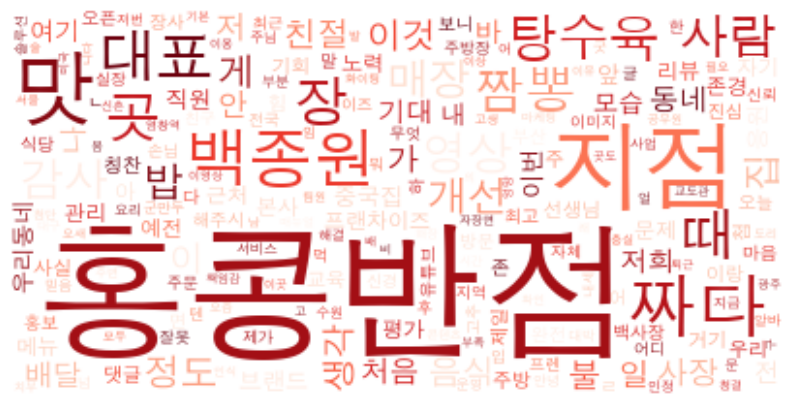

In [48]:
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",
    background_color="white",
    colormap = "Reds"
).generate_from_frequencies(grouped_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")  # 축 제거
plt.show()

In [116]:
df["review_date"] = pd.to_datetime(df["review_date"])

In [117]:
before_df = df[(df["review_date"] < "2024-06-03") & (df["classification_result"] == -1)]

In [118]:
after_df = df[(df["review_date"] >= "2024-06-03") & (df["classification_result"] == -1)]

In [119]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n = before_df['tokens_n'].tolist()

In [120]:
sentences_n

[['키오스크', '주문', '최악', '주문', '관리', '곳', '주방', '이모'],
 ['친절', '분만', '음식', '손님', '관심', '손님', '인사', '맛'],
 ['맛',
  '프렌',
  '이즈',
  '평',
  '타',
  '장안',
  '매장',
  '회전',
  '공간',
  '부족',
  '반찬',
  '셀프',
  '존대',
  '서빙',
  '문제점',
  '어르신',
  '테이블',
  '주문',
  '모름',
  '배달',
  '목소리',
  '음식',
  '손가락',
  '그릇',
  '안',
  '위생',
  '서빙',
  '절대'],
 ['배',
  '민',
  '쟁반',
  '짜',
  '장',
  '기름',
  '상상',
  '이상',
  '리뷰',
  '기름',
  '별점',
  '내',
  '리뷰',
  '신고',
  '게시',
  '중단',
  '요청',
  '운영',
  '수준',
  '내',
  '쌍',
  '욕',
  '생각'],
 ['짬뽕', '담'],
 ['곳', '가세', '짬뽕', '맛', '도안', '선생님', '이름', '최악'],
 ['맛', '키오스크', '주문', '불편', '가게', '테이블', '홀', '사람'],
 ['인',
  '세트',
  '짬봉',
  '밥',
  '탕수육',
  '짬뽕',
  '밥',
  '면',
  '밥',
  '세트',
  '면',
  '원래',
  '다음',
  '다음',
  '짬뽕',
  '밥',
  '가격',
  '짬뽕',
  '홍콩',
  '반점',
  '짬뽕',
  '물',
  '컵',
  '밥',
  '가게',
  '별점',
  '이번',
  '처음',
  '후기',
  '좋아서',
  '실망'],
 ['하나', '음식', '순서', '엉망', '배달', '환불', '장사', '앞', '일', '예'],
 ['짬뽕', '감칠맛', '도', '짜장면', '초콜릿', '버전', '주변', '매장', '사', '먹', '으', '추'],
 ['백종

In [121]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습 (Skip-gram 방식)
model = Word2Vec(sentences_n, vector_size=32, window=10, sg=1, min_count=2, workers=4)

In [122]:
# 특정 단어와 유사한 단어 찾기
similar_words = model.wv.most_similar('맛', topn=200)
print(similar_words)

[('지점', 0.9831528663635254), ('제일', 0.982218325138092), ('느낌', 0.980468213558197), ('체인점', 0.9722244739532471), ('예전', 0.9712158441543579), ('소금', 0.9696969389915466), ('성비', 0.968711256980896), ('일반', 0.9673287868499756), ('야채', 0.9660338759422302), ('실망', 0.9650514125823975), ('중국집', 0.9645264148712158), ('양배추', 0.9642087817192078), ('최악', 0.9632459878921509), ('지금', 0.9625411033630371), ('가격', 0.9618968367576599), ('재료', 0.9614636301994324), ('오랜만', 0.9614242911338806), ('양이', 0.9610251188278198), ('비교', 0.9602479934692383), ('만', 0.9595537781715393), ('안나', 0.9590694308280945), ('오징어', 0.9590197801589966), ('넘', 0.9586638808250427), ('차이', 0.9581511616706848), ('남', 0.9573082327842712), ('레시', 0.9567814469337463), ('볶음', 0.9550756812095642), ('돼지고기', 0.9542739391326904), ('후추', 0.9538041949272156), ('해물', 0.9518435001373291), ('건더기', 0.9517872333526611), ('면도', 0.9502471685409546), ('밀가루', 0.9484630227088928), ('맛나', 0.947753369808197), ('장도', 0.9464125633239746), ('만두', 0.94546365

In [123]:
# tokens_adjv 컬럼의 데이터를 리스트 형태로 사용
sentences_adjv = before_df['tokens_adjv'].tolist()

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None, min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_adjv)

# 단어별 TF-IDF 스코어 확인
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

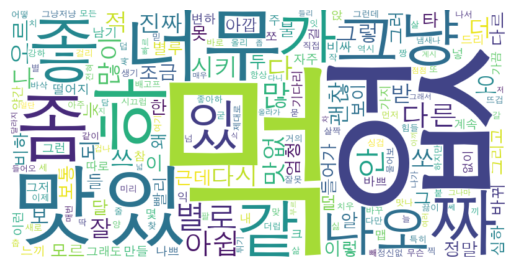

In [124]:
# 워드투백터와 tf-idf 모두 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF 스코어를 기반으로 워드 클라우드 생성
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(tfidf_scores)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

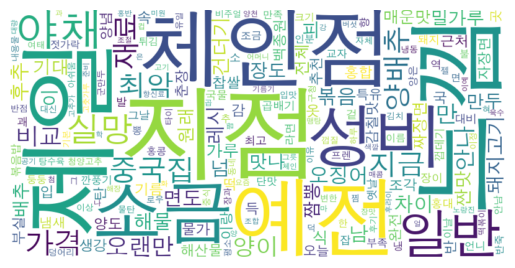

In [125]:
# 워드투백터만 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word2Vec 유사도 점수를 기반으로 워드 클라우드 생성
similar_words_dict = dict(similar_words)  # Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환

word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(similar_words_dict)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n = after_df['tokens_n'].tolist()

In [127]:
sentences_n

[['시간',
  '생각',
  '주문',
  '취소',
  '배',
  '민',
  '리뷰',
  '못',
  '대신',
  '배달',
  '예정',
  '시간',
  '시간',
  '안와',
  '전화',
  '배달',
  '기사',
  '배',
  '차',
  '조리',
  '시작',
  '안',
  '주문',
  '손님',
  '시간',
  '신경',
  '파렴치한',
  '가게',
  '전화',
  '주문',
  '가요',
  '시간',
  '배달',
  '기사',
  '탓',
  '조리',
  '시작',
  '안',
  '책임감',
  '행동',
  '생각',
  '동네',
  '방문',
  '배달',
  '최악',
  '가게'],
 ['재활용',
  '안',
  '음식',
  '입',
  '맛',
  '상한',
  '이후',
  '간지',
  '아내',
  '젓가락',
  '자장',
  '소스',
  '백종원',
  '이름',
  '이제',
  '다방',
  '엿'],
 ['짜장면', '파', '양파', '맛', '탕수육', '소스', '짜장면', '탕수육', '소스', '소스'],
 ['내',
  '전국',
  '홍콩',
  '반점',
  '지점',
  '최고',
  '맛',
  '최근',
  '백종원',
  '유튜브',
  '현황',
  '고개',
  '방문',
  '의사',
  '솔루션',
  '이후',
  '확인',
  '엄두'],
 ['짬뽕',
  '짬뽕',
  '밥',
  '으',
  '르',
  '확인',
  '요청',
  '끝',
  '짬뽕',
  '밥',
  '주장',
  '영수증',
  '짬뽕',
  '짬뽕',
  '밥',
  '이',
  '제가',
  '짬뽕',
  '밥',
  '끝',
  '직원',
  '분이',
  '짬뽕',
  '확인',
  '사과',
  '나',
  '열',
  '주문',
  '번호',
  '자리',
  '확인',
  '다시'],
 ['저어', '엉', '말', '자장면', '고무줄', '양념', '베이지

In [128]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습 (Skip-gram 방식)
model = Word2Vec(sentences_n, vector_size=32, window=10, sg=1, min_count=2, workers=4)

In [129]:
# 특정 단어와 유사한 단어 찾기
similar_words = model.wv.most_similar('맛', topn=200)
print(similar_words)

[('주문', 0.995730996131897), ('예전', 0.9955758452415466), ('사진', 0.9952518939971924), ('처음', 0.9952130913734436), ('일', 0.9951063394546509), ('나', 0.995071291923523), ('면', 0.995004415512085), ('이상', 0.9949163794517517), ('홀', 0.9948253035545349), ('안나', 0.9947623014450073), ('신경', 0.9946337342262268), ('이랑', 0.9946323037147522), ('알바', 0.9945882558822632), ('홍콩', 0.9944716095924377), ('자장면', 0.9943597912788391), ('사람', 0.9943468570709229), ('건지', 0.9943362474441528), ('장사', 0.9942243695259094), ('날파리', 0.9942152500152588), ('이건', 0.9940980672836304), ('뭐', 0.994045078754425), ('에어컨', 0.9939741492271423), ('밥', 0.9938037991523743), ('카운터', 0.9937833547592163), ('손님', 0.9937393665313721), ('직원', 0.9937365651130676), ('정도', 0.9936966896057129), ('기분', 0.9936893582344055), ('얼', 0.9935952425003052), ('매장', 0.9934852719306946), ('계란', 0.9933997988700867), ('짜장면', 0.9933875203132629), ('혼', 0.9933820962905884), ('홍합', 0.9933673739433289), ('짬뽕', 0.9933479428291321), ('와서', 0.9933010935783386)

In [130]:
# tokens_adjv 컬럼의 데이터를 리스트 형태로 사용
sentences_adjv = after_df['tokens_adjv'].tolist()

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None, min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_adjv)

# 단어별 TF-IDF 스코어 확인
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

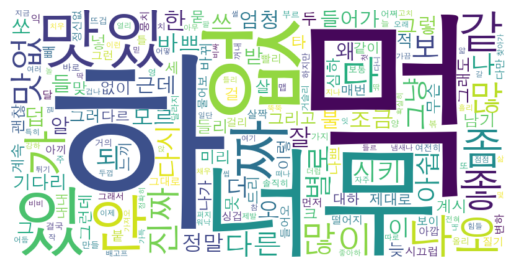

In [131]:
# 워드투백터와 tf-idf 모두 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF 스코어를 기반으로 워드 클라우드 생성
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(tfidf_scores)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

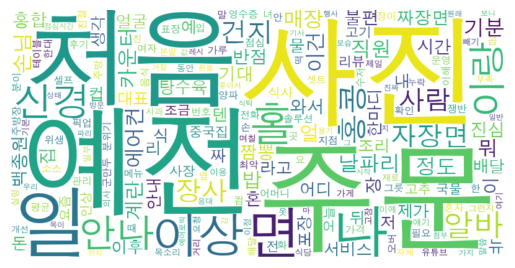

In [132]:
# 워드투백터만 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word2Vec 유사도 점수를 기반으로 워드 클라우드 생성
similar_words_dict = dict(similar_words)  # Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환

word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(similar_words_dict)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_3525/4130233833.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_n_words.values()), y=list(top_n_words.keys()), palette='viridis')


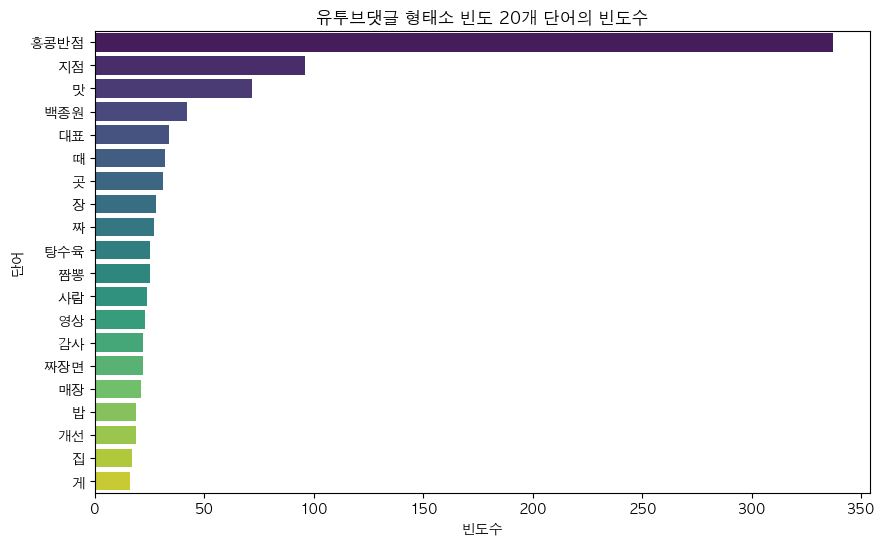

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 에서 한글 폰트를 제공하지 않기 때문에, 내 컴퓨터의 폰트를 가져오는 코드
from matplotlib import font_manager,rc
plt.rc("font",family="AppleGothic") # 이 코드만 넣어도 실행 되긴 함.

# 1. 빈도수 상위 n개의 단어 선택 (예: 상위 10개)
n = 20
top_n_words = dict(grouped_counts.most_common(n))

# 2. 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_n_words.values()), y=list(top_n_words.keys()), palette='viridis')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title(f'유투브댓글 형태소 빈도 {n}개 단어의 빈도수')
plt.show()

In [91]:
bad_df = df[(df["classification_result"] == -1)]

In [92]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n1 = bad_df['tokens_n'].tolist()

In [93]:
sentences_n1

[['안녕하세요',
  '주방',
  '직원',
  '지점',
  '말씀',
  '이유',
  '사장',
  '하루',
  '종일',
  '유튜브',
  '댓글',
  '본사',
  '직원',
  '달',
  '점검',
  '잘못',
  '별말씀',
  '안',
  '말',
  '연락',
  '방법',
  '거짓',
  '일시',
  '허위사실유포',
  '죄'],
 ['홍콩반점', '담당', '부서', '제일', '라고', '홍콩반점', '소리', '그것', '일안', '솔루션', '능력'],
 ['담당자', '동안', '꿀', '대체'],
 ['요새',
  '홍콩반점',
  '중국집',
  '자체',
  '예전',
  '주방장',
  '밑',
  '오픈',
  '한',
  '맛',
  '요새',
  '배',
  '백수',
  '요리'],
 ['파주',
  '디스플레이',
  '점검',
  '자장면',
  '고기',
  '고기',
  '고기',
  '짜장',
  '메뉴',
  '짜장밥',
  '지단',
  '일반',
  '달걀',
  '후라이'],
 ['백종원',
  '담당자',
  '안',
  '사람',
  '기회',
  '본보기',
  '부서',
  '담당자',
  '가맹점',
  '주',
  '잘못',
  '젤',
  '죄인',
  '담당자'],
 ['교육', '메뉴', '얼', '책', '차이', '메뉴', '얼'],
 ['화나',
  '언론',
  '발등',
  '불똥',
  '수습',
  '현실',
  '막말',
  '홍콩반점',
  '점바점',
  '얘기',
  '이상은',
  '백종원',
  '대표',
  '신경',
  '안',
  '임',
  '이번',
  '기회',
  '시도',
  '기존',
  '업체',
  '시간'],
 ['담당자', '분이', '팀장', '급', '사태', '리가', '편안', '당황'],
 ['인도네시아',
  '거주',
  '사람',
  '인도네시아',
  '자카르타',
  '홍콩반점',
  '확인',
  '해주시

In [94]:
from konlpy.tag import Komoran
from collections import Counter

# 1. Komoran 형태소 분석기 초기화
komoran = Komoran()

# 2. 단어와 품사 태그를 포함한 빈도 계산
word_pos_counts = Counter()

for tokens in sentences_n1:
    if isinstance(tokens, list):  # 리스트인지 확인
        for token in tokens:
            pos_tags = komoran.pos(token)  # 품사 태깅 수행
            word_pos_counts.update([f"{word}/{pos}" for word, pos in pos_tags])

# 3. 비슷한 단어들 묶기 위한 그룹핑 규칙 정의
grouping_rules = {
    '맛있': '맛',  # '맛있다', '맛있어요' 등은 '맛'으로 통합
    '짜': '짜다',  # '짜다', '좋아요' 등은 '좋다'로 통합
    '별로': '별로',  # '별로'는 그대로 유지
    '반점': '홍콩반점',  # '홍콩반점' 그대로 유지
    '홍콩': '홍콩반점',  # '홍콩반점' 그대로 유지
    '점': '지점',
    '음식': '음식',  # '음식' 그대로 유지
    '쌍': '쌍욕'
}

# 4. 비슷한 단어들로 묶어 빈도 계산
grouped_counts = Counter()

for word_pos, count in word_pos_counts.items():
    word, pos = word_pos.split('/')
    # 그룹핑 규칙에 따라 단어 변환
    for key in grouping_rules:
        if word.startswith(key):
            grouped_word = grouping_rules[key]
            grouped_counts[grouped_word] += count  # 품사 태그 제외하고 업데이트
            break
    else:
        grouped_counts[word] += count  # 원래 단어만 저장

# 5. 묶은 후의 단어 출현 빈도 출력
print("비슷한 단어들로 묶은 후의 단어 출현 빈도:")
print(grouped_counts)

비슷한 단어들로 묶은 후의 단어 출현 빈도:
Counter({'홍콩반점': 786, '지점': 244, '맛': 227, '짜다': 183, '안': 141, '장': 109, '짬뽕': 109, '탕수육': 108, '백종원': 107, '음식': 82, '면': 70, '사람': 68, '본사': 66, '가': 61, '관리': 61, 'ㄹ': 58, '때': 58, '문제': 58, '게': 56, '직원': 55, '곳': 55, '이': 54, '중국집': 52, '정도': 52, '매장': 52, '말': 49, '일': 49, '고기': 49, '생각': 47, '뭐': 46, '집': 45, '내': 43, '동네': 43, '메뉴': 42, '사장': 41, '전': 41, '하': 41, '배달': 41, '소스': 39, '주': 38, '프랜차이즈': 37, '대표': 36, '담당자': 35, '위생': 35, '바': 33, '식당': 33, '처음': 32, '한': 30, '돈': 30, '개선': 30, '주방': 29, '얼': 29, '아': 29, '나': 29, '브랜드': 29, '요리': 27, '이것': 27, 'ㄴ': 27, '오': 27, '지': 26, '제가': 26, '저': 26, '불': 26, '밥': 25, '아서': 25, '최악': 25, '인간': 25, 'ㄴ지': 24, '오픈': 23, '피': 23, '이제': 23, '자기': 23, '본인': 23, '이상': 22, '국물': 22, '이유': 21, '지금': 21, '빽': 21, '영상': 21, '레시': 20, '뒤': 20, '가격': 20, '떡': 20, '그것': 19, '예전': 19, '확인': 19, '한국': 19, '보': 19, '부탁': 19, '걸': 19, '얘기': 18, '그': 18, '이미지': 18, '장사': 18, '도': 18, '손님': 18, '부산': 18, '여기': 17, '어':

In [52]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

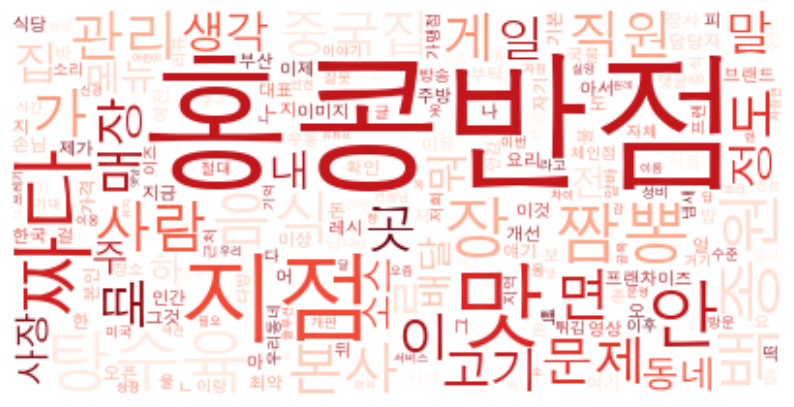

In [54]:
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",
    background_color="white",
    colormap = "Reds"
).generate_from_frequencies(grouped_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")  # 축 제거
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_3525/4130233833.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_n_words.values()), y=list(top_n_words.keys()), palette='viridis')


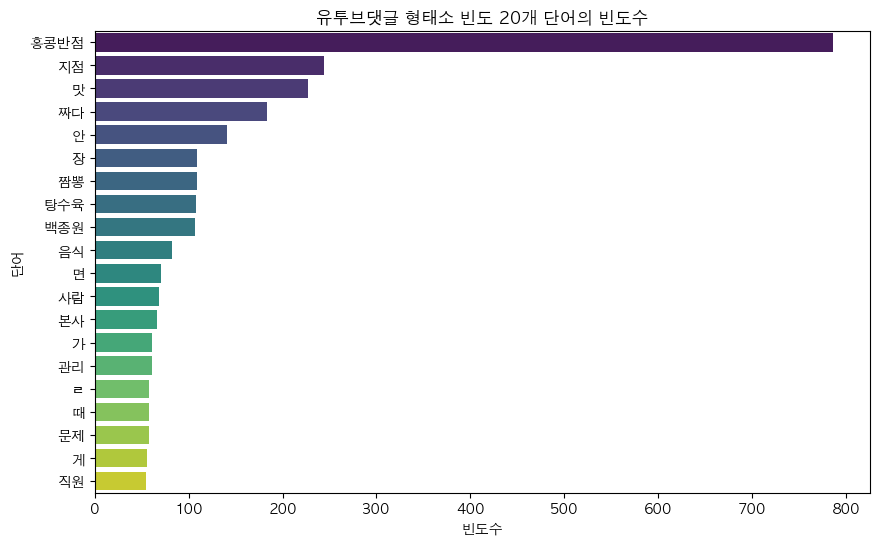

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 에서 한글 폰트를 제공하지 않기 때문에, 내 컴퓨터의 폰트를 가져오는 코드
from matplotlib import font_manager,rc
plt.rc("font",family="AppleGothic") # 이 코드만 넣어도 실행 되긴 함.

# 1. 빈도수 상위 n개의 단어 선택 (예: 상위 10개)
n = 20
top_n_words = dict(grouped_counts.most_common(n))

# 2. 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_n_words.values()), y=list(top_n_words.keys()), palette='viridis')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title(f'유투브댓글 형태소 빈도 {n}개 단어의 빈도수')
plt.show()

### **다른 방식의 시각화**

In [40]:
### 전
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설정
font_path = "/Library/Fonts/AppleGothic.ttf  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 예제 코드 (앞서 작성한 코드)
import heapq

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 막대 그래프 시각화
plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Words by Similarity Score')
plt.xlim(0.9, 1.0)  # x축 범위를 0.9부터 1.0으로 설정
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 역순으로 정렬
plt.show()


SyntaxError: unterminated string literal (detected at line 6) (568445001.py, line 6)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import heapq

# 한글 글꼴 설정
font_path = "/Library/Fonts/AppleGothic.ttf"  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 사용자 정의 색상 목록
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', 
                 '#c2f0c2', '#f0b3ff', '#ff6666', '#c2d6d6']

# 파이 차트 시각화 (시계방향, 사용자 정의 색상 적용)
plt.figure(figsize=(10, 10))
plt.pie(scores, labels=words, autopct='%1.1f%%', startangle=120, colors=custom_colors, counterclock=False)
plt.title('Top 10 Words by Similarity Score')
plt.show()


In [ ]:
### 후
import matplotlib.pyplot as plt
import heapq

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 막대 그래프 시각화
plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Words by Similarity Score')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 역순으로 정렬
plt.show()